# Step 2: Cloning and Building Darknet

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 14.45 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [6]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-02-21 16:20:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   107MB/s    in 2.2s    

2021-02-21 16:20:59 (107 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!

In [8]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

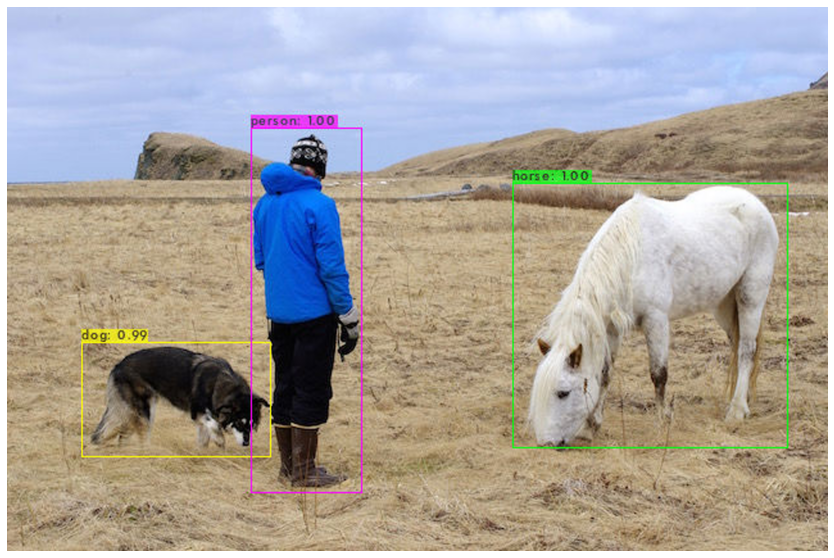

In [9]:
# show image using our helper function
imShow('predictions.jpg')

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
3rdparty	darknet			include		       README.md
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
build		darknet_images.py	LICENSE		       scripts
build.ps1	darknet.py		Makefile	       src
build.sh	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		image_yolov3.sh		obj		       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		predictions.jpg        yolov3.weights


In [11]:
%cd /content/gdrive/My Drive/Licenta/ColabStorage
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls

/content/gdrive/My Drive/Licenta/ColabStorage
backup					    img_4k_2.jpg  obj.zip
darknet					    img_4k_3.jpg  unnamed.jpg
generate_train.py			    img_4k.png	  yolov3_custom.cfg
haarcascade_licence_plate_rus_16stages.xml  obj.data
haarcascade_russian_plate_number.xml	    obj.names


/content/gdrive/My Drive/Licenta/ColabStorage/darknet
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer

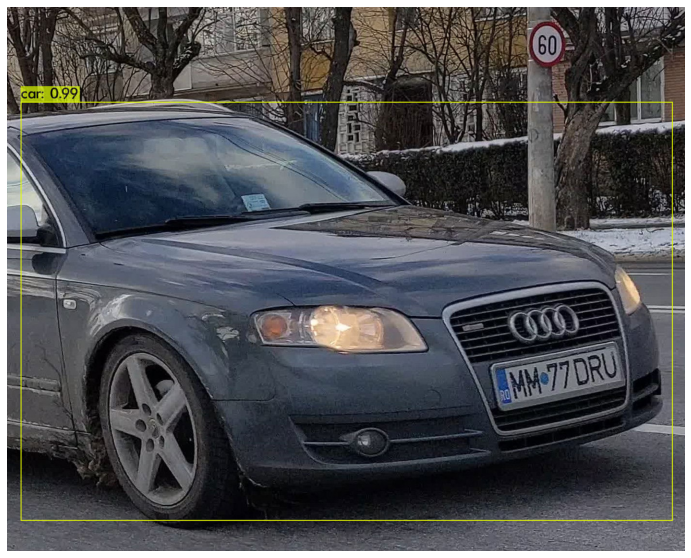

In [12]:
%cd darknet
!chmod +x ./darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/Licenta/ColabStorage/img_4k_2.jpg
imShow('predictions.jpg')

In [12]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
# !cp predictions.jpg /mydrive/Licenta/ColabStorage/detection1.jpg

# Extracting dataset from google drive

In [43]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/Licenta/ColabStorage

backup					    img_4k_2.jpg  obj.zip
darknet					    img_4k_3.jpg  unnamed.jpg
generate_train.py			    img_4k.png	  yolov3_custom.cfg
haarcascade_licence_plate_rus_16stages.xml  obj.data
haarcascade_russian_plate_number.xml	    obj.names


In [44]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/Licenta/ColabStorage/obj.zip ../

cp: '/mydrive/Licenta/ColabStorage/obj.zip' and '../obj.zip' are the same file


In [15]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
replace data/obj/00072b81abc72d21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Configure files

In [17]:
# download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/Licenta/ColabStorage/yolov3_custom2.cfg

In [45]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/yolov3_custom.cfg ./cfg

In [46]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/obj.names ./data
!cp /mydrive/Licenta/ColabStorage/obj.data  ./data

# Generate train.txt

In [47]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/generate_train.py ./


In [49]:
!python generate_train.py

In [50]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

00072b81abc72d21.jpg  4ea89c654152476e.txt  a0e02c5deb8b3dac.txt
00072b81abc72d21.txt  4f12b65c28f86454.jpg  a0f4460644dd0630.jpg
000812dcf304a8e7.jpg  4f12b65c28f86454.txt  a0f4460644dd0630.txt
000812dcf304a8e7.txt  4f947a93884225bb.jpg  a124f35a301fef97.jpg
000f52302c1341eb.jpg  4f947a93884225bb.txt  a124f35a301fef97.txt
000f52302c1341eb.txt  4fc9d7fc0f49ac14.jpg  a1a52291716afd23.jpg
001065dbc46c29c8.jpg  4fc9d7fc0f49ac14.txt  a1a52291716afd23.txt
001065dbc46c29c8.txt  4fe2eddb7c280885.jpg  a2ad6543d03041c2.jpg
0010f4c10f7ab07e.jpg  4fe2eddb7c280885.txt  a2ad6543d03041c2.txt
0010f4c10f7ab07e.txt  4feafb5bb7596ce0.jpg  a2b4274133a6e372.jpg
001cdd25e148cd36.jpg  4feafb5bb7596ce0.txt  a2b4274133a6e372.txt
001cdd25e148cd36.txt  4ffa82c5e90f6c3c.jpg  a2c325790731e505.jpg
003cd2790a0978ef.jpg  4ffa82c5e90f6c3c.txt  a2c325790731e505.txt
003cd2790a0978ef.txt  50786c8f50f80925.jpg  a2e5b62a39aceb5a.jpg
003df8cf2effae50.jpg  50786c8f50f80925.txt  a2e5b62a39aceb5a.txt
003df8cf2effae50.txt  50a

# Download pre-trained weights

In [20]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-21 16:26:48--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  68.9MB/s    in 2.2s    

2021-02-21 16:26:50 (68.9 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!chmod +x ./darknet
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.004057, iou_loss = 0.000000, total_loss = 0.004057 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.347495), count: 2, class_loss = 0.593761, iou_loss = 1.116202, total_loss = 1.709963 
 total_bbox = 31866, rewritten_bbox = 0.144354 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.566517), count: 2, class_loss = 0.584564, iou_loss = 0.552556, total_loss = 1.137121 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.003817, iou_loss = 0.000000, total_loss = 0.003817 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.467768), count: 3, class_loss = 0.929601, iou_loss = 1.095252, total_loss = 2.024854 
 total_bbox = 31871, rewritten_bbox = 0.144332 % 
v3 (mse

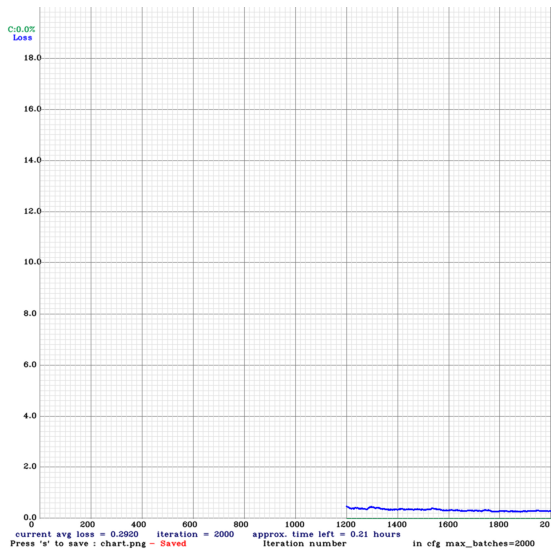

In [39]:
imShow('chart.png')

# If google kicks us off, load the last weights and run this

In [51]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Licenta/ColabStorage/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 10

# Run my custom object detector

In [52]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/gdrive/My Drive/Licenta/ColabStorage/darknet/cfg
/content/gdrive/My Drive/Licenta/ColabStorage/darknet


 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

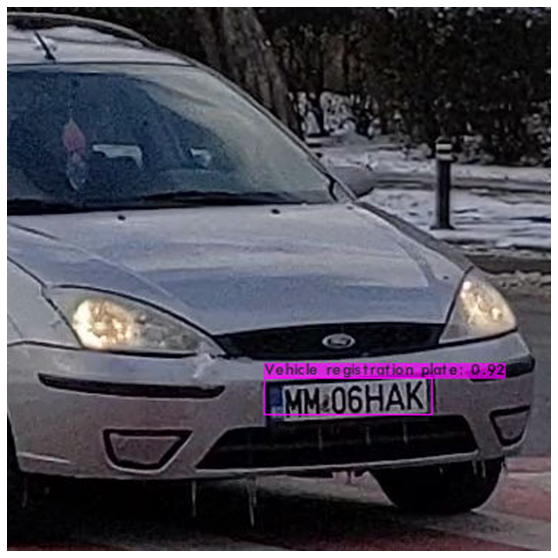

In [57]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Licenta/ColabStorage/backup/yolov3_custom_final.weights /mydrive/Licenta/ColabStorage/img_4k.png -thresh 0.3
imShow('predictions.jpg')